## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_metadata["Mouse ID"].is_unique

True

In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
study_results["Mouse ID"].value_counts()

g989    13
m957    10
e476    10
p438    10
t718    10
        ..
t573     1
u153     1
v199     1
h428     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
df["Mouse ID"].count()

1893

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = df[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
df[df["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = df[df["Mouse ID"] != "g989"]

In [11]:
# Checking the number of mice in the clean DataFrame.
cleandf["Mouse ID"].count()

1880

In [12]:
cleandf.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

## Summary Statistics

In [13]:
cleandf.isnull().sum()

Mouse ID              0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
dtype: int64

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = cleandf.groupby("Drug Regimen")
tumor_volume = regimen_group["Tumor Volume (mm3)"]
# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [15]:
def summary_statistics():
    tumor_volume_mean = tumor_volume.mean()
    tumor_volume_median = tumor_volume.median()
    tumor_volume_variance = tumor_volume.var()
    tumor_volume_std = tumor_volume.std()
    tumor_volume_sem = tumor_volume.sem()

    return pd.DataFrame({"Mean tumor volume": tumor_volume_mean,
                        "Median tumor volume": tumor_volume_median,
                        "Tumor volume variance": tumor_volume_variance,
                        "Tumor volume standard deviation": tumor_volume_std,
                        "Tumor volume SEM": tumor_volume_sem
                        })

In [16]:
tumor_volume_each_regimen_summary = summary_statistics()
tumor_volume_each_regimen_summary

,Mean tumor volume,Median tumor volume,Tumor volume variance,Tumor volume standard deviation,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [18]:
cleandf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_count_per_treatment = cleandf.groupby("Drug Regimen")["Mouse ID"].nunique().rename("Count")
mice_count_per_treatment

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Count, dtype: int64

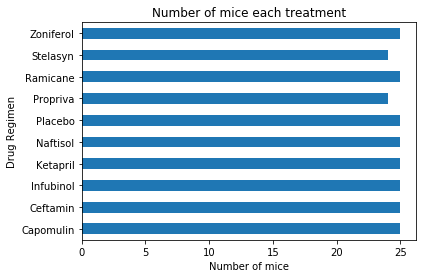

<Figure size 432x288 with 0 Axes>

In [20]:
bar_chart = mice_count_per_treatment.plot(kind="barh", title="Number of mice each treatment")
bar_chart.set_xlabel("Number of mice")
plt.show()
plt.tight_layout()

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_count_per_treatment_df = pd.DataFrame(mice_count_per_treatment).reset_index()
mice_count_per_treatment_df

,Drug Regimen,Count
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


In [22]:
drug_regimen = mice_count_per_treatment_df.iloc[:,0]
drug_regimen

0    Capomulin
1     Ceftamin
2    Infubinol
3     Ketapril
4     Naftisol
5      Placebo
6     Propriva
7     Ramicane
8     Stelasyn
9    Zoniferol
Name: Drug Regimen, dtype: object

In [23]:
mice_count = mice_count_per_treatment_df.iloc[:,1]
mice_count

0    25
1    25
2    25
3    25
4    25
5    25
6    24
7    25
8    24
9    25
Name: Count, dtype: int64

Text(0, 0.5, 'Drug Regimen')

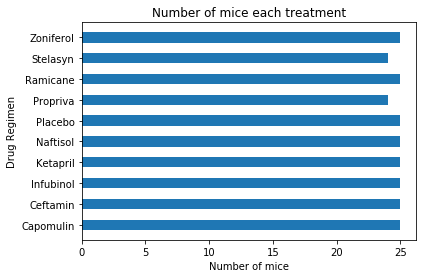

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.barh(drug_regimen, mice_count, height=0.5)
plt.title("Number of mice each treatment")
plt.xlabel("Number of mice")
plt.ylabel("Drug Regimen")

In [25]:
sexgroup_count = cleandf.groupby("Sex")["Mouse ID"].nunique().rename("Count")
sexgroup_count

Sex
Female    123
Male      125
Name: Count, dtype: int64

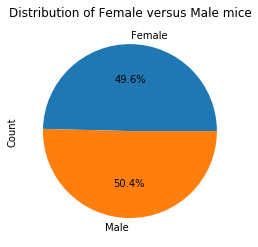

In [26]:
sexgroup_count.plot(kind="pie", autopct="%1.1f%%", title="Distribution of Female versus Male mice")

In [27]:
sexcount_df = pd.DataFrame(sexgroup_count).reset_index()
sexcount_df

,Sex,Count
0,Female,123
1,Male,125


In [28]:
gender = sexcount_df.iloc[:,0]
gender

0    Female
1      Male
Name: Sex, dtype: object

In [29]:
gender_count = sexcount_df.iloc[:,1]
gender_count

0    123
1    125
Name: Count, dtype: int64

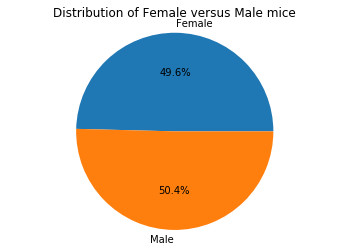

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, labels=gender, autopct="%1.1f%%")
plt.title("Distribution of Female versus Male mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_df = cleandf[cleandf["Drug Regimen"].isin(treatment_list)]
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [33]:
sorted_df = selected_df.sort_values(by=["Drug Regimen", "Mouse ID", "Timepoint"])

In [43]:
final_tumor_groupby = sorted_df.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].last().rename("Final Tumor Volume (mm3)")
final_tumor_df = pd.DataFrame(final_tumor_groupby).reset_index()[["Drug Regimen", "Final Tumor Volume (mm3)"]]
final_tumor_df = final_tumor_df.set_index("Drug Regimen")
final_tumor_df

,Final Tumor Volume (mm3)
Drug Regimen,
Capomulin,38.982878
Capomulin,38.939633
Capomulin,30.485985
Capomulin,37.074024
Capomulin,40.159220
...,...
Ramicane,30.276232
Ramicane,40.667713
Ramicane,43.166373


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = list()

for treatment in treatment_list:
    filtered_series = final_tumor_df.loc[treatment, "Final Tumor Volume (mm3)"]
    quartiles = filtered_series.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25], 3)
    upperq = round(quartiles[0.75], 3)
    iqr = round((upperq-lowerq), 3)
    median = round(quartiles[0.5], 3)

    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {median}")

    lower_bound = round((lowerq - (1.5*iqr)), 3)
    upper_bound = round((upperq + (1.5*iqr)), 3)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    outlier = filtered_series[(filtered_series < lower_bound) | (filtered_series > upper_bound)]
    print(outlier)
        
    print("----------------------------------------------------------")
    
    tumor_vol_list.append(filtered_series.tolist())

The lower quartile of Capomulin is: 32.377
The upper quartile of Capomulin is: 40.159
The interquartile range of Capomulin is: 7.782
The the median of Capomulin is: 38.125
Values below 20.704 could be outliers.
Values above 51.832 could be outliers.
Series([], Name: Final Tumor Volume (mm3), dtype: float64)
----------------------------------------------------------
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.659
The interquartile range of Ramicane is: 9.099
The the median of Ramicane is: 36.562
Values below 17.911 could be outliers.
Values above 54.308 could be outliers.
Series([], Name: Final Tumor Volume (mm3), dtype: float64)
----------------------------------------------------------
The lower quartile of Infubinol is: 54.049
The upper quartile of Infubinol is: 65.526
The interquartile range of Infubinol is: 11.477
The the median of Infubinol is: 60.165
Values below 36.834 could be outliers.
Values above 82.742 could be outliers.
Drug Regimen
Infub

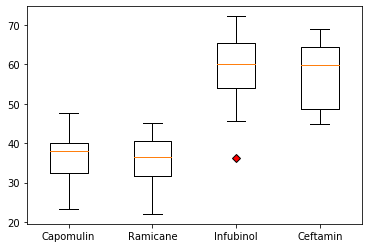

In [74]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_list, labels=treatment_list, flierprops=red_diamond)
plt.show()

## Line and Scatter Plots

In [76]:
cleandf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [97]:
capomulin_df = cleandf[cleandf["Drug Regimen"] == "Capomulin"].set_index("Mouse ID")
capomulin_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
j246,0,45.000000,0,Capomulin,Female,21,21
r554,0,45.000000,0,Capomulin,Female,8,17
s185,0,45.000000,0,Capomulin,Female,3,17
b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...
s710,45,40.728578,1,Capomulin,Female,1,23
j119,45,38.125164,1,Capomulin,Female,7,23
i557,45,47.685963,1,Capomulin,Female,1,24


In [100]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_to_search = input("Which Mouse ID would you like to look at? ")

Which Mouse ID would you like to look at? s185


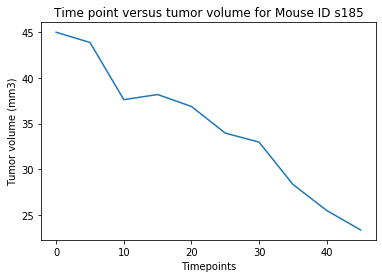

In [105]:
time_point_the_mouse = capomulin_df.loc[mouse_to_search, "Timepoint"]
tumor_volume_the_mouse = capomulin_df.loc[mouse_to_search, "Tumor Volume (mm3)"]

plt.plot(time_point_the_mouse, tumor_volume_the_mouse)

plt.title(f"Time point versus tumor volume for Mouse ID {mouse_to_search}")
plt.xlabel("Timepoints")
plt.ylabel("Tumor volume (mm3)")
plt.show()

In [102]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_tumor_group = capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().rename("Average tumor volume (mm3)")
weight_tumor_df = pd.DataFrame(weight_tumor_group).reset_index()
weight_tumor_df

,Mouse ID,Weight (g),Average tumor volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


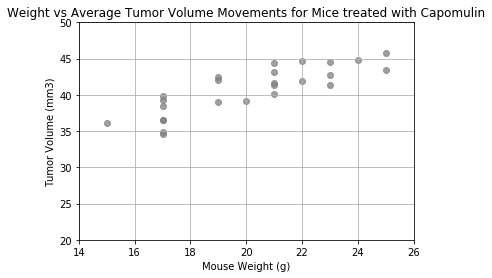

In [96]:
plt.scatter(weight_tumor_df["Weight (g)"], weight_tumor_df["Average tumor volume (mm3)"], facecolors="grey", alpha=0.75)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume Movements for Mice treated with Capomulin")
plt.xlim(14,26)
plt.ylim(20,50)
plt.grid()
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
